In [2]:
import mlib
import random
import sys
import time
from matplotlib import pyplot as plt

Basic operations

In [3]:
a = mlib.Marray([[1,2], [3,4]])
# info in an marray
print(f"creating marray from python list: {a}, shape {a.shape}, ndim: {a.ndim}")


creating marray from python list: [[1.0, 2.0],[3.0, 4.0]], shape (2, 2), ndim: 2


In [4]:
# reshape
b = a.reshape(1,2,1,2)
print(f"reshaping: {b}, shape {b.shape}, ndim: {b.ndim}")

reshaping: [[[[1.0, 2.0]],[[3.0, 4.0]]]], shape (1, 2, 1, 2), ndim: 4


In [5]:
# +, -, / **, ect
c = a + a * a / a ** a + a.log() + a.exp()
print(f"basic operations: {c}, shape {c.shape}, ndim: {c.ndim}")

basic operations: [[4.718281828459045, 11.082203279490596],[24.51748254518911, 60.04694439426413]], shape (2, 2), ndim: 2


In [6]:
# views of an marray, note that section_of_b and b share point to same data
section_of_a = a[0]
print(f"view a section of marray: {section_of_a}, shape {section_of_a.shape}, ndim: {section_of_a.ndim}")

view a section of marray: [1.0, 2.0], shape (2,), ndim: 1


In [7]:
# tranpose
a_tranpose = a.T
print(f"marray: {a_tranpose}, shape {a_tranpose.shape}, ndim: {a_tranpose.ndim}")


marray: [[1.0, 3.0],[2.0, 4.0]], shape (2, 2), ndim: 2


In [8]:
# matrix multiplication (only for 2d marrays!)
matmul_ata = a_tranpose @ a
print(f"marray: {matmul_ata}, shape {matmul_ata.shape}, ndim: {matmul_ata.ndim}")


marray: [[10.0, 14.0],[14.0, 20.0]], shape [2, 2], ndim: 2


In [9]:
# inverse, note fails if a must be square and positive semi defenite
inverse_a = a.inverse()
print(f"marray: {inverse_a}, shape {inverse_a.shape}, ndim: {inverse_a.ndim}")

marray: [[-1.9999999999999998, 1.0],[1.4999999999999998, -0.49999999999999994]], shape (2, 2), ndim: 2


In [10]:
# random vector, from lo - hi
rand = mlib.functions.random(0,1,5).reshape(5)
print(f"marray: {rand}, shape {rand.shape}, ndim: {rand.ndim}")

marray: [0.3835020774898595, 0.5194163720679545, 0.8309653461123655, 0.034572110527461446, 0.05346163504452521], shape (5,), ndim: 1


speed & space of mlib vs vanilla python

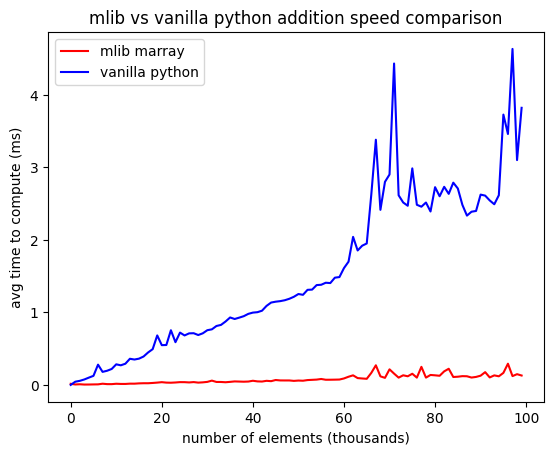

In [11]:
x_mlib, y_mlib = [], []
x_van, y_van = [], []
MAX_NUM_ELEMENTS = 100000
STEP_SIZE = 1000
RUNS_PER_TEST = 10
for n in range(1, MAX_NUM_ELEMENTS, STEP_SIZE):
    x_mlib.append(n / 1000)
    x_van.append(n / 1000)

    x = mlib.random(0,1,n)
    y = mlib.random(0,1,n)
    a = [random.uniform(0,1) for _ in range(n)]
    b = [random.uniform(0,1) for _ in range(n)]

    start = time.time()
    for _ in range(RUNS_PER_TEST):
        _c = x + y
    end = time.time()
    mlib_time = (end - start) * 1000 / RUNS_PER_TEST

    start = time.time()
    for _ in range(RUNS_PER_TEST):
        _c = [elema + elemb for elema, elemb in zip(a,b)]
    end = time.time()
    van_time = (end - start) * 1000 / RUNS_PER_TEST

    y_mlib.append(mlib_time)
    y_van.append(van_time)

plt.plot(x_mlib, y_mlib, "-r", label="mlib marray")
plt.plot(x_van, y_van, "-b", label="vanilla python")
plt.xlabel("number of elements (thousands)")
plt.ylabel("avg time to compute (ms)")
plt.title("mlib vs vanilla python addition speed comparison")
plt.legend(loc="upper left")

plt.show()



Simple linear regression with fake data


(20, 1)
(20, 1)
estimated slope: 1.9426172415383545


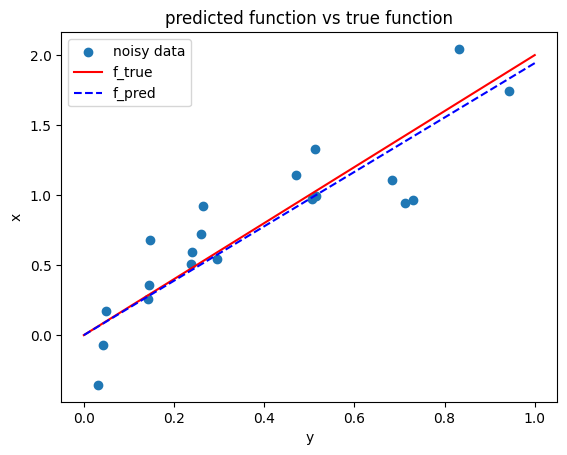

In [12]:
# training samples
n = 20

# true functions to be predicted: f(x) = x * 2
f_true = lambda array: [x * 2 for x in array] 

# sample data with noise, need to reshape x_train, y_train to be 2d for matmul
x_train = mlib.random(0, 1, n).reshape(n, 1)
y_train = x_train * 2 + mlib.random(-0.5, 0.5, n).reshape(n, 1)
print(x_train.shape)
print(y_train.shape)

# estimator: w_hat = (X.T @ X).inverse() @ X.T @ Y
w_hat = ((x_train.T @ x_train).inverse() @ x_train.T @ y_train).item()
# predicted function: f_pred(x) = x * w_hat
f_pred = lambda array: [x * w_hat for x in array]
print(f"estimated slope: {w_hat}")

# data for graphing true functions 
line = mlib.linespace(0, 1, 5).to_list()

plt.scatter(x_train.reshape(n).to_list(), y_train.reshape(n).to_list(), label="noisy data")
plt.plot(line, f_true(line), "-r", label="f_true")
plt.plot(line, f_pred(line), "b", label="f_pred", linestyle='dashed')
plt.xlabel("y")
plt.ylabel("x")
plt.title("predicted function vs true function")
plt.legend(loc="upper left")

plt.show()

Autograd

In [19]:
# by default, Marrays will hold information about their gradient
# you can check this through the .req_grad attribute
x = mlib.Marray([1,2,3])
y = mlib.Marray([3,2,1])
z = x * y
w = z.sum()
w.backward() # default gradient of a single item is 1
print(f"gradient of w: {w.grad}")
print(f"gradient of z: {z.grad}")
print(f"gradient of x: {x.grad}")
print(f"gradient of y: {y.grad}")



gradient of w: [1.0]
gradient of z: [1.0, 1.0, 1.0]
gradient of x: [3.0, 2.0, 1.0]
gradient of y: [1.0, 2.0, 3.0]
